### Implementation of graphical d-separation

http://web.mit.edu/jmn/www/6.034/d-separation.pdf

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

from copy import copy, deepcopy

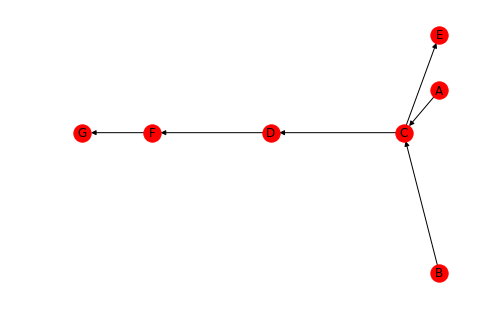

In [2]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'C'), 
                  ('B', 'C'),
                  ('C', 'D'),('C', 'E'),
                  ('D', 'F'),
                  ('F', 'G')
                  ])


nx.draw(DG, with_labels=True, pos=nx.spectral_layout(DG))

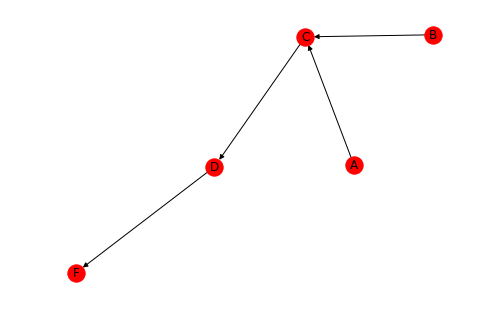

In [3]:
Z = ['D', 'F']

a = 'A'
b = 'B'

nodes = list(copy(DG.nodes()))

A = set(Z)
for node in [a, b, *list(Z)]:
    A.update(nx.ancestors(DG, node))

for node in nodes:
    if node not in [a, b, *list(A)]:
        DG.remove_node(node)

nx.draw(DG, with_labels=True)

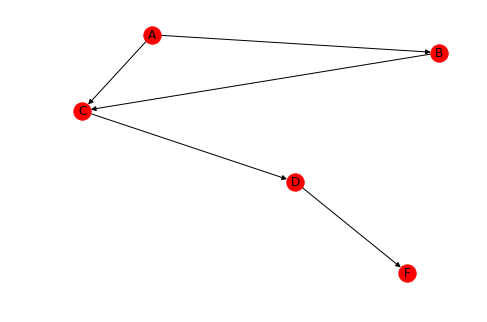

In [4]:
from itertools import combinations

for node in DG.nodes():
    parents = list(DG.predecessors(node))
    
    if len(parents) >= 2:
        for p1, p2 in combinations(parents, 2):
            DG.add_edge(p1, p2)
        
nx.draw(DG, with_labels=True)

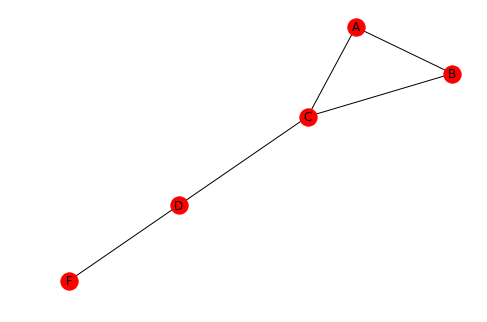

In [5]:
G = nx.Graph(DG)
nx.draw(G, with_labels=True)

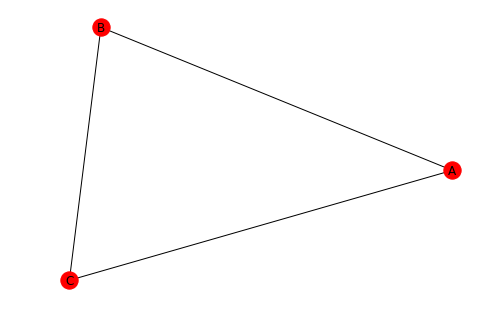

In [6]:
for node in Z:
    G.remove_node(node)
    
nx.draw(G, with_labels=True)

In [7]:
d_separated = not nx.has_path(G, a, b)
d_separated

False

In [8]:
def are_nodes_d_separated(a, b, Z, DG):
    DG = deepcopy(DG)
    nodes = list(copy(DG.nodes()))

    z_ancestors = set(Z)
    for node in [a, b, *list(Z)]:
        z_ancestors.update(nx.ancestors(DG, node))
        
    for node in nodes:
        if node not in [a, b, *list(z_ancestors)]:
            DG.remove_node(node)

    for node in DG.nodes():
        parents = list(DG.predecessors(node))
        if len(parents) >= 2:
            for p1, p2 in combinations(parents, 2):
                DG.add_edge(p1, p2)
                  
    G = nx.Graph(DG)
    
    for node in Z:
        G.remove_node(node)
        
    return G, not nx.has_path(G, a, b)
    

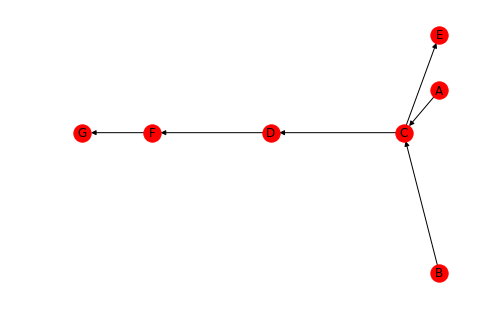

In [9]:
DG = nx.DiGraph()
DG.add_edges_from([('A', 'C'), 
                  ('B', 'C'),
                  ('C', 'D'),('C', 'E'),
                  ('D', 'F'),
                  ('F', 'G')
                  ])

nx.draw(DG, with_labels=True, pos=nx.spectral_layout(DG))

False


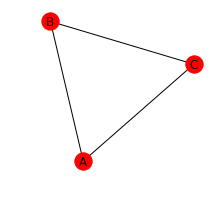

In [10]:
G, dsep = are_nodes_d_separated('A', 'B', ['D', 'F'], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

True


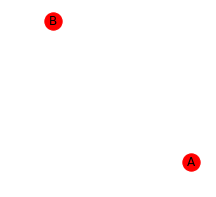

In [11]:
G, dsep = are_nodes_d_separated('A', 'B', [], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

False


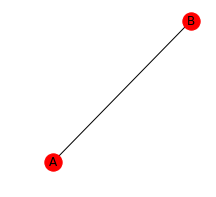

In [12]:
G, dsep = are_nodes_d_separated('A', 'B', ['C'], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

True


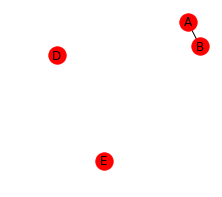

In [13]:
G, dsep = are_nodes_d_separated('D', 'E', ['C'], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

False


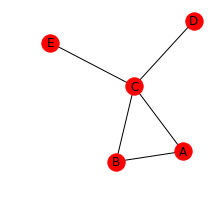

In [14]:
G, dsep = are_nodes_d_separated('D', 'E', [], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

False


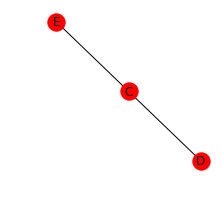

In [15]:
G, dsep = are_nodes_d_separated('D', 'E', ['A', 'B'], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

False


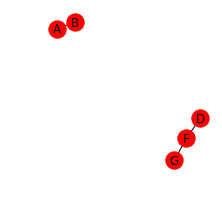

In [16]:
G, dsep = are_nodes_d_separated('D', 'G', ['C'], DG)
_, ax = plt.subplots(figsize=(3, 3))
nx.draw(G, with_labels=True, ax=ax)
print(dsep)

In [17]:
def check_d_separation_for_all_pairs(Z, DG):
    checks = set()
    for a, b in combinations(DG.nodes(), 2):
        if a not in Z and b not in Z:
            _, des = are_nodes_d_separated(a, b, Z, DG)
            checks.add((a, b, des))
    return checks

In [18]:
check_d_separation_for_all_pairs(['C'], DG)

{('A', 'B', False),
 ('A', 'D', True),
 ('A', 'E', True),
 ('A', 'F', True),
 ('A', 'G', True),
 ('B', 'D', True),
 ('B', 'E', True),
 ('B', 'F', True),
 ('B', 'G', True),
 ('D', 'E', True),
 ('D', 'F', False),
 ('D', 'G', False),
 ('E', 'F', True),
 ('E', 'G', True),
 ('F', 'G', False)}

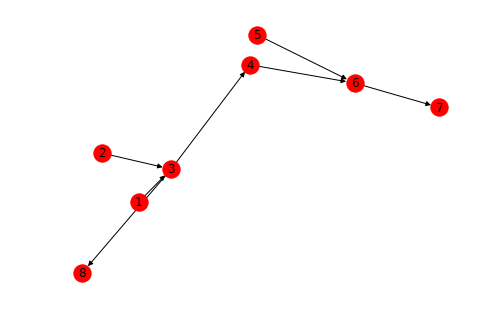

In [19]:
DG = nx.DiGraph()
DG.add_edges_from([(1, 3),
                   (2, 3),
                   (3, 8),
                   (3, 4),
                   (5, 6),
                   (4, 6),
                   (6, 7)])

nx.draw(DG, with_labels=True)

In [20]:
pairs = check_d_separation_for_all_pairs([3], DG)
pairs

{(1, 2, False),
 (1, 4, True),
 (1, 5, True),
 (1, 6, True),
 (1, 7, True),
 (1, 8, True),
 (2, 4, True),
 (2, 5, True),
 (2, 6, True),
 (2, 7, True),
 (2, 8, True),
 (4, 5, True),
 (4, 6, False),
 (4, 7, False),
 (5, 6, False),
 (5, 7, False),
 (6, 7, False),
 (8, 4, True),
 (8, 5, True),
 (8, 6, True),
 (8, 7, True)}

In [21]:
d_sep = {node: 0 for node in DG.nodes()}
for a, b, is_dsep in pairs:
    if is_dsep:
        d_sep[a] += 1
        d_sep[b] += 1
            
d_sep

{1: 5, 3: 0, 2: 5, 8: 6, 4: 4, 5: 4, 6: 3, 7: 3}

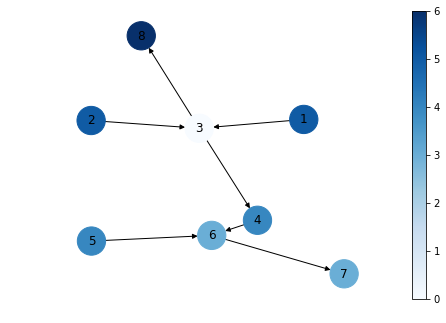

In [22]:
colors = [v for _, v in d_sep.items()]
nx.draw(DG, with_labels=True, node_color=colors, node_size=800, cmap=plt.cm.Blues)

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(colors)
_ = plt.colorbar(sm)

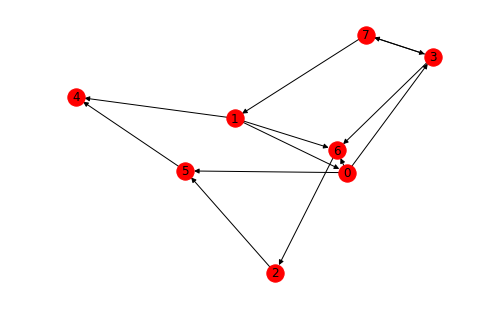

In [23]:
graph = nx.erdos_renyi_graph(n=8, p=.15, directed=True, seed=45)
nx.draw(graph, with_labels=True)

In [24]:
pairs = check_d_separation_for_all_pairs([5, 1], graph)
pairs

{(0, 2, False),
 (0, 3, False),
 (0, 4, True),
 (0, 6, False),
 (0, 7, False),
 (2, 3, False),
 (2, 4, True),
 (2, 6, False),
 (2, 7, False),
 (3, 4, True),
 (3, 6, False),
 (3, 7, False),
 (4, 6, True),
 (4, 7, True),
 (6, 7, False)}